In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = None

In [4]:
data = pd.read_csv('shift_results_acc1110.csv')


In [26]:
data = data[data.optimizer == 'adam']
data50 = data[data.dataset== 'whobin_50']
data62 = data[data.dataset == 'whobin_62']
data75 = data[data.dataset == 'whobin_75']
data94 = data[data.dataset == 'whobin_94']

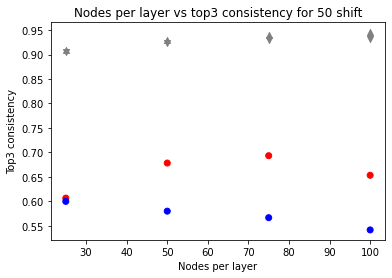

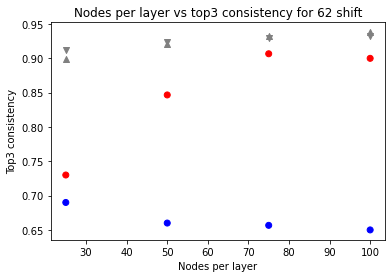

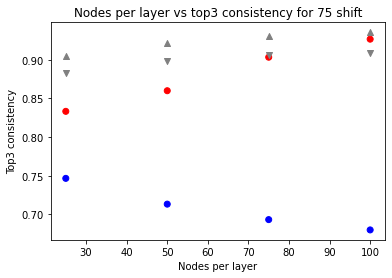

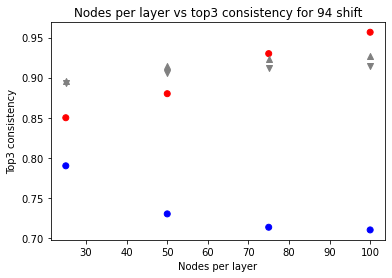

In [41]:
# colors = {('soft', 'adam'):'red', ('soft', 'sgd'): 'orange', ('relu', 'adam'):'blue', 
#             ('relu', 'sgd'): 'green'}
# plt.scatter(data50.nodes_per_layer, data50.top3_orig_compare, 
#             color=pd.Series(zip(data50.activation, data50.optimizer)).map(colors))
ixs = ['50','62','75','94']
i=0
for d in [data50, data62, data75, data94]:
    colors = {'soft': 'red', 'relu':'blue'}
    plt.scatter(d.nodes_per_layer, d.top3_orig_compare,color=d.activation.map(colors))
    plt.scatter(d[d.activation=='relu'].nodes_per_layer, d[d.activation=='relu'].avg_acc_train_shift,color='gray',marker='^')
    plt.scatter(d[d.activation=='relu'].nodes_per_layer, d[d.activation=='relu'].avg_acc_test_shift, color='gray',marker='v')
    plt.title("Nodes per layer vs top3 consistency for " + ixs[i] + " shift")
    plt.xlabel("Nodes per layer")
    plt.ylabel("Top3 consistency")
    plt.show()
    i+=1

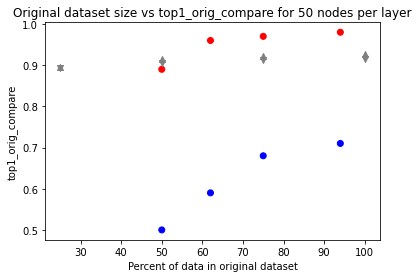

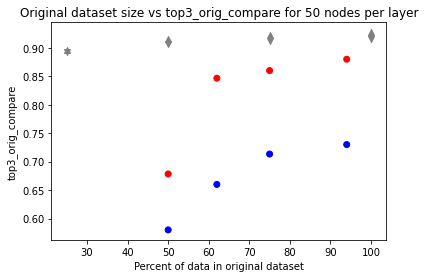

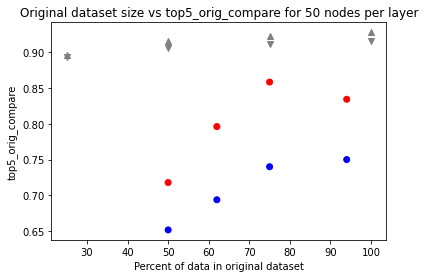

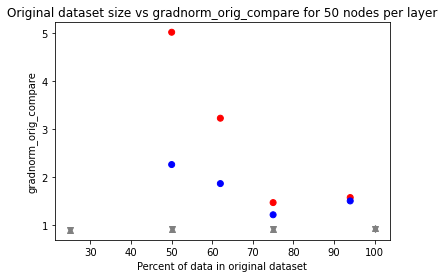

In [44]:
datasets = {'whobin_50': 50, 'whobin_62': 62, 'whobin_75': 75, 'whobin_94': 94}
d50 = data[data.nodes_per_layer == 50]
for metric in ['top1_orig_compare', 'top3_orig_compare', 'top5_orig_compare', 'gradnorm_orig_compare']:
    plt.scatter(d50.dataset.map(datasets), d50[metric], color=d50.activation.map(colors))

    plt.scatter(d[d.activation=='relu'].nodes_per_layer, d[d.activation=='relu'].avg_acc_train_shift,color='gray',marker='^')
    plt.scatter(d[d.activation=='relu'].nodes_per_layer, d[d.activation=='relu'].avg_acc_test_shift, color='gray',marker='v')
    plt.title("Original dataset size vs " + metric + " for 50 nodes per layer")
    plt.xlabel("Percent of data in original dataset")
    plt.ylabel(metric)
    plt.show()